# Introduction to Plotting Images - MMC 2025

First, we need to start by importing our libraries needed for this work.

In [71]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

We can then set up the plotting backend - "qt5" will create popups, whereas "inline" or "widget" will show in notebook.

In [72]:
%matplotlib inline

We can create a random array to start testing out matplotlib plotting.

In [73]:
im = np.random.random((100, 100))

In [74]:
im.dtype

dtype('float64')

Now, let's plot the image. plt.figure is a simple method to generate a figure, which we can then customise.

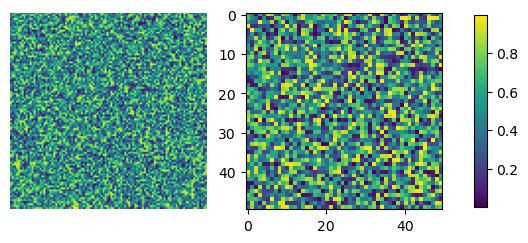

In [75]:
plt.figure()
plt.subplot(121)
plt.imshow(im)
plt.axis('off')
plt.subplot(122)
plt.imshow(im[25:75, 25:75])

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.3, 0.02, 0.4])
# ['left', 'bottom'. 'width', 'height']
plt.colorbar(cax=cax)

plt.show()

If you want more control over different parameters, you can use plt.subplots(). 

This function creates a plot with more layout control, and axis customisations, through the "fig" and "ax" objects.

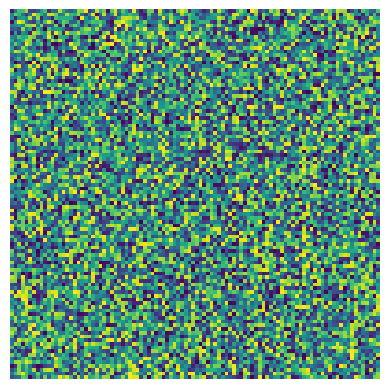

In [76]:
fig, ax = plt.subplots()
ax.imshow(im)
ax.axis('off')
plt.show()

Now, let's instead try loading in a tif image.

In [77]:
im = np.asarray(Image.open('JEOL HAADF Image.tiff'))

In [78]:
im

array([[ 6,  4,  2, ...,  5,  6,  5],
       [ 5,  3,  3, ...,  7,  6,  5],
       [ 6,  5,  3, ...,  4,  6,  6],
       ...,
       [ 7,  7,  8, ..., 10, 11, 11],
       [ 7,  7,  8, ..., 10,  9, 10],
       [ 7,  6,  5, ...,  9,  9, 10]], dtype=uint8)

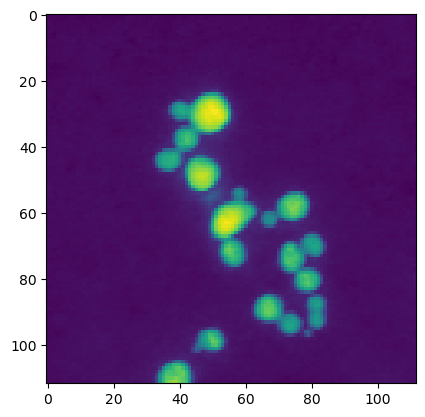

In [79]:
plt.imshow(im)

You'll notice the image colour map ranges from purple to yellow. This is the default "viridis" cmap. Let's check some of the other options, and try plotting with these colours, with a plt.subplot() figure.

In [80]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

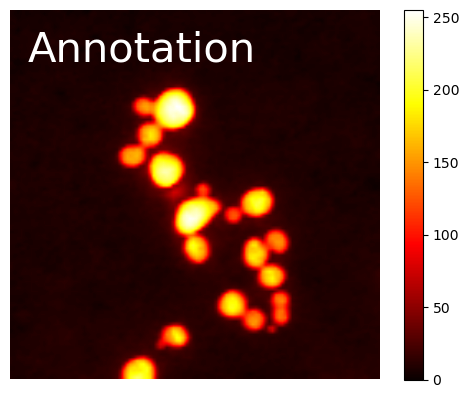

In [81]:
fig, ax = plt.subplots()
im_plotted = ax.imshow(im, interpolation='bilinear', cmap = 'hot')
# by assigning "ax.imshow" to a variable, we can use this later to input into other functions!
ax.axis('off')
ax.text(5, 15, "Annotation", color="white", fontsize=30)
fig.colorbar(im_plotted, ax=ax)

Now, typically we will want to add a scalebar. Matplotlib can do this, but first we'll import the relevant packages.

In [82]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

Let's have a look at how we set up our scale bar. Using "ax.transdata", we can use relative positioning and sizing.

In [83]:
fontprops = fm.FontProperties(size=30)
scalebar = AnchoredSizeBar(
        transform=ax.transData, size=10, label='5 nm',
        loc=4, frameon=False,
        color='white', size_vertical=0.7,
        label_top=False,
        fontproperties=fontprops)

Finally, lets bring it all together!

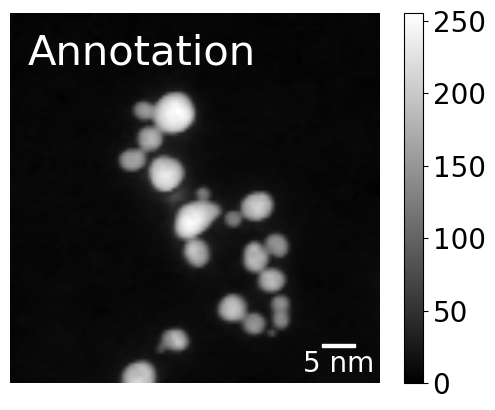

In [84]:
fig, ax = plt.subplots()
im_plotted = ax.imshow(im, interpolation='bilinear', cmap = 'grey')
ax.axis('off')
ax.text(5, 15, "Annotation", color="white", fontsize=30)
cbar = fig.colorbar(im_plotted, ax=ax)
cbar.ax.tick_params(labelsize=20)

fontprops = fm.FontProperties(size=20)
scalebar = AnchoredSizeBar(
        transform=ax.transData, size=10, label='5 nm',
        loc=4, frameon=False,
        color='white', size_vertical=0.7,
        label_top=False,
        fontproperties=fontprops)
ax.add_artist(scalebar)

You can also use plt.subplots() to plot multiple images:

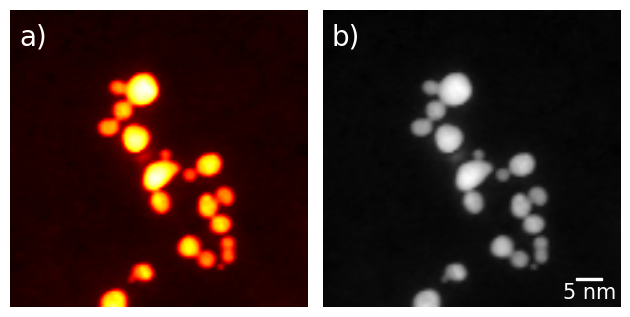

In [85]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)

im_plotted0 = ax[0].imshow(im, interpolation='bilinear', cmap = 'hot')
ax[0].axis('off')
ax[0].text(3, 13, "a)", color="white", fontsize=20)

im_plotted1 = ax[1].imshow(im, interpolation='bilinear', cmap = 'grey')
ax[1].axis('off')
ax[1].text(3, 13, "b)", color="white", fontsize=20)

fontprops = fm.FontProperties(size=15)
scalebar = AnchoredSizeBar(
        transform=ax[1].transData, size=10, label='5 nm',
        loc=4, frameon=False,
        color='white', size_vertical=0.7,
        label_top=False,
        fontproperties=fontprops)

ax[1].add_artist(scalebar)

plt.tight_layout()
#plt.savefig("MMC_Workshop_Fig.png")